<a id="header"></a>
# Part 5: miscellaneous topics

In [1]:
from samurai import *
from plotting import *

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
from IPython.display import display
%matplotlib inline

pd.options.display.max_rows = None

/Users/rconcep/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.4 of module 'mtrand' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/rconcep/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.4 of module 'pandas.hashtable' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/rconcep/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 864, got 824
  return f(*args, **kwds)
/Users/rconcep/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.4 of module 'pandas.tslib' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/rconcep/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.4 of module 'pandas.lib' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/rconcep/anaconda/lib/python3.

/Users/rconcep/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.4 of module 'scipy.cluster._vq' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/rconcep/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: builtins.type size changed, may indicate binary incompatibility. Expected 864, got 824
  return f(*args, **kwds)
/Users/rconcep/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.4 of module 'scipy.cluster._hierarchy' does not match runtime version 3.6
  return f(*args, **kwds)


## On buff priority

SAM has two self buffs and one target debuff to apply. The slashing resistance down debuff may be applied by WAR and NIN within 2-3 GCDs, letting you defer Yukikaze. What order should you apply your buffs and debuffs from a fresh start? Let's examine some rotations that differ only in the buff/debuff application order.

### Shifu, Jinpu, Yukikaze

In [2]:
sam = Samurai(kenki_mastery=True)

actions = [('Hakaze'), ('Shifu'), ('Kasha'),
           ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka')]

In [3]:
df_buffs_0, average_potency, pps = sam.parse_rotation(actions)
display(df_buffs_0)

average potency per GCD = 511.8080952380951
average potency per second = 235.701096491


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Shifu,,280.000,False,False,False,0,5,430.000
2,4.56,Kasha,,400.000,False,True,False,0,10,830.000
3,6.72,Higanbana,,240.000,False,True,False,0,20,1070.000
4,8.88,Hakaze,,175.200,False,True,False,1,20,1245.200
5,11.04,Jinpu,,308.980,False,True,False,1,25,1554.180
6,13.20,Gekko,,488.980,True,True,False,1,30,2043.160
7,15.36,Hakaze,,201.480,True,True,False,1,40,2244.640
8,17.52,Yukikaze,,419.980,True,True,False,1,45,2664.620
9,19.68,Hakaze,Hissatsu: Shinten,603.405,True,True,True,1,55,3268.025


### Jinpu, Shifu, Yukikaze

In [4]:
sam = Samurai(kenki_mastery=True)

actions = [('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),           
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka')]

In [5]:
df_buffs_1, average_potency, pps = sam.parse_rotation(actions)
display(df_buffs_1)

average potency per GCD = 523.5026190476191
average potency per second = 236.115871993


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Jinpu,,280.000,False,False,False,0,5,430.000
2,4.80,Gekko,,460.000,True,False,False,0,10,890.000
3,7.20,Higanbana,,276.000,True,False,False,0,20,1166.000
4,9.60,Hakaze,,209.530,True,False,False,1,20,1375.530
5,12.00,Shifu,,359.030,True,False,False,1,25,1734.560
6,14.16,Kasha,,493.327,True,True,False,1,30,2227.887
7,16.32,Hakaze,,205.827,True,True,False,1,40,2433.714
8,18.48,Yukikaze,,424.327,True,True,False,1,45,2858.041
9,20.64,Hakaze,Hissatsu: Shinten,607.752,True,True,True,1,55,3465.793


### Yukikaze, Jinpu, Shifu

In [6]:
sam = Samurai(kenki_mastery=True)

actions = [('Hakaze'), ('Yukikaze'),
           ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),           
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze')]

In [7]:
df_buffs_2, average_potency, pps = sam.parse_rotation(actions)
display(df_buffs_2)

average potency per GCD = 515.7328571428571
average potency per second = 230.237882653


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Yukikaze,,340.000,False,False,False,0,5,490.000
2,4.80,Higanbana,,266.400,False,False,True,0,15,756.400
3,7.20,Hakaze,,194.500,False,False,True,1,15,950.900
4,9.60,Jinpu,,343.000,False,False,True,1,20,1293.900
5,12.00,Gekko,,542.800,True,False,True,1,25,1836.700
6,14.40,Hakaze,,223.675,True,False,True,1,35,2060.375
7,16.80,Shifu,,389.620,True,False,True,1,40,2449.995
8,18.96,Kasha,Hissatsu: Shinten,922.530,True,True,True,1,45,3372.525
9,21.12,Hakaze,Hissatsu: Shinten,603.405,True,True,True,1,30,3975.930


### Yukikaze, Shifu, Jinpu

In [8]:
sam = Samurai(kenki_mastery=True)

actions = [('Hakaze'), ('Yukikaze'),
           ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),           
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze')]

In [9]:
df_buffs_3, average_potency, pps = sam.parse_rotation(actions)
display(df_buffs_3)

average potency per GCD = 508.13214285714287
average potency per second = 230.370790155


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Yukikaze,,340.000,False,False,False,0,5,490.000
2,4.80,Higanbana,,266.400,False,False,True,0,15,756.400
3,7.20,Hakaze,,194.500,False,False,True,1,15,950.900
4,9.60,Shifu,,338.800,False,False,True,1,20,1289.700
5,11.76,Kasha,,469.200,False,True,True,1,25,1758.900
6,13.92,Hakaze,,191.700,False,True,True,1,35,1950.600
7,16.08,Jinpu,,339.780,False,True,True,1,40,2290.380
8,18.24,Gekko,Hissatsu: Shinten,922.530,True,True,True,1,45,3212.910
9,20.40,Hakaze,Hissatsu: Shinten,603.405,True,True,True,1,30,3816.315


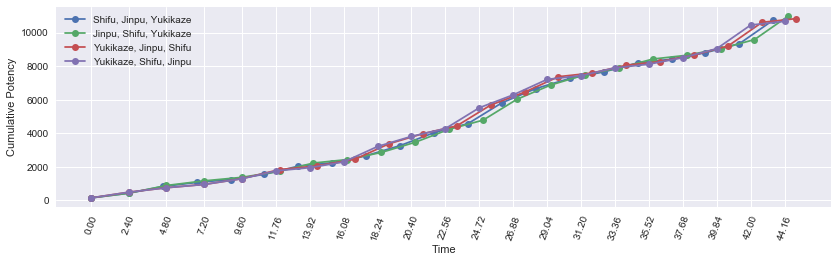

In [10]:
compare_n_potencies([df_buffs_0, df_buffs_1, df_buffs_2, df_buffs_3], ['Shifu, Jinpu, Yukikaze', 'Jinpu, Shifu, Yukikaze', 'Yukikaze, Jinpu, Shifu', 'Yukikaze, Shifu, Jinpu'])

The results are quite close but Jinpu > Shifu > Yukikaze appears to be the highest priority. For total party DPS, contributions due to (~16s) earlier application of the slashing resistance down debuff should be accounted for, assuming no WAR or NIN in the party. How do priorities differ if someone else, e.g., WAR, can applythe debuff instead?

In [17]:
sam = Samurai(kenki_mastery=True)
sam.applied_yukikaze = True

actions = [('Hakaze'), ('Shifu'), ('Kasha'),
           ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu', 'Hissatsu: Shinten'), ('Kasha', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka')]

df_buffs_0_sl, average_potency, pps = sam.parse_rotation(actions)

sam = Samurai(kenki_mastery=True)
sam.applied_yukikaze = True

actions = [('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),           
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Yukikaze', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka')]

df_buffs_1_sl, average_potency, pps = sam.parse_rotation(actions)

sam = Samurai(kenki_mastery=True)
sam.applied_yukikaze = True

actions = [('Hakaze'), ('Yukikaze'),
           ('Higanbana'),
           ('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Shinten'),           
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze')]

df_buffs_2_sl, average_potency, pps = sam.parse_rotation(actions)

sam = Samurai(kenki_mastery=True)
sam.applied_yukikaze = True

actions = [('Hakaze'), ('Yukikaze'),
           ('Higanbana'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Jinpu'), ('Gekko', 'Hissatsu: Shinten'),           
           ('Hakaze', 'Hissatsu: Shinten'), ('Yukikaze', 'Hagakure'),
           ('Hakaze', 'Hissatsu: Guren'), ('Jinpu', 'Hissatsu: Shinten'), ('Gekko', 'Hissatsu: Shinten'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Hakaze')]

df_buffs_3_sl, average_potency, pps = sam.parse_rotation(actions)

average potency per GCD = 522.7740476190475
average potency per second = 240.75120614
average potency per GCD = 535.3092857142858
average potency per second = 241.441043814
average potency per GCD = 515.7328571428571
average potency per second = 230.237882653
average potency per GCD = 508.13214285714287
average potency per second = 230.370790155


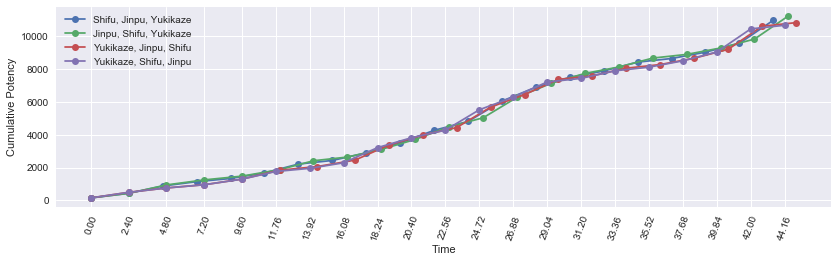

In [18]:
compare_n_potencies([df_buffs_0_sl, df_buffs_1_sl, df_buffs_2_sl, df_buffs_3_sl], ['Shifu, Jinpu, Yukikaze', 'Jinpu, Shifu, Yukikaze', 'Yukikaze, Jinpu, Shifu', 'Yukikaze, Shifu, Jinpu'])

Here I made the assumption that the slashing resistance down debuff was already applied at the beginning of each rotation. We see that the value of deferring Yukikaze increases if someone else can apply the debuff instead. Although the average potency per GCD is much higher when applying Jinpu before Shifu while the delta in pps is much smaller, the results are likely to change as your skill speed changes.

## On Meikyo Shisui
Some of the initial questions of Meikyo Shisui were if Iaijutsu would consume charges of it and if combo actions initiated during it would continue after the buff expired. Testing on the live server showed:

- Iaijutsu * does not * consume charges
- Combo actions * do not * continue after the buff expires

The first revelation increases the flexibility of Meikyo Shisui. With the buff's 10s duration, it is possible to spend your three charges while using an Iaijutsu sometime in between. The implications of that are immense:

1) High, raw damage in 3-4 GCDs
    * e.g., with Setsu already open, do Kasha, Gekko+Hissatsu: Kaiten, Midare Setsugekka, Kasha. That's 1200+1080=2280 potency in 4 GCDs plus 30 Kenki.

2) Up to 30 Kenki generated in 3-4 GCDs

3) Expedited Sen opening for rapid Iaijutsu and/or Kenki generation via Hagakure

The sheer potency and utility of Kasha, Gekko, and (to a lesser extent) Yukikaze exemplify how powerful Meikyo Shisui is. At 400 potency (340 for Yukikaze) and 10 Kenki generated for each, the opportunity to skip the lower potency and Kenki production of Hakaze, Shifu, and Jinpu is immense. From a damage and potential damage perspective, it is optimal to use Meikyo Shisui to do some combination of Kasha, Gekko, and Yukikaze with an Iaijutsu in between.

### Example 1: Two of Kasha or Gekko, one of the other

In [28]:
sam = Samurai(kenki_mastery=True)

actions = [('Hakaze'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Shifu'), ('Kasha'),
           ('Hakaze'), ('Yukikaze', 'Hissatsu: Guren'),
           ('Hakaze', 'Hagakure'), ('Yukikaze', 'Meikyo Shisui'),
           ('Gekko', 'Hissatsu: Shinten'), ('Kasha', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Kasha', 'Hissatsu: Shinten'),
           ('Hakaze', 'Hissatsu: Shinten'), ('Jinpu'), ('Gekko'),
           ('Hakaze'), ('Yukikaze'),
           ('Hakaze'), ('Shifu', 'Hissatsu: Kaiten'),
           ('Midare Setsugekka'),
           ('Kasha')]

df_ms, average_potency, pps = sam.parse_rotation(actions)
display(df_ms)

average potency per GCD = 515.395652173913
average potency per second = 234.085703002


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.00,Hakaze,,150.000,False,False,False,0,0,150.000
1,2.40,Jinpu,,280.000,False,False,False,0,5,430.000
2,4.80,Gekko,,460.000,True,False,False,0,10,890.000
3,7.20,Hakaze,,172.500,True,False,False,0,20,1062.500
4,9.60,Shifu,,322.000,True,False,False,0,25,1384.500
5,11.76,Kasha,,460.000,True,True,False,0,30,1844.500
6,13.92,Hakaze,,172.500,True,True,False,0,40,2017.000
7,16.08,Yukikaze,Hissatsu: Guren,1412.200,True,True,False,0,45,3429.200
8,18.24,Hakaze,Hagakure,191.475,True,True,True,0,5,3620.675
9,20.40,Yukikaze,Meikyo Shisui,434.010,True,True,True,0,70,4054.685


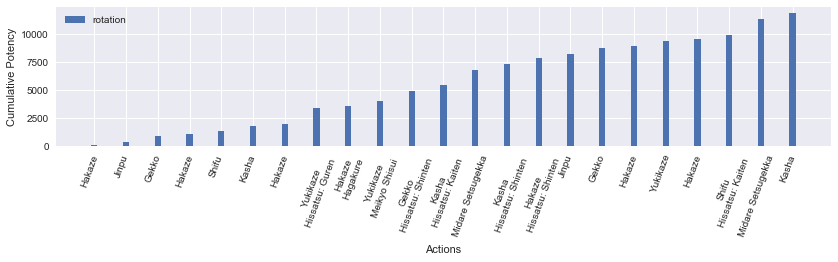

In [29]:
plot_potency(df_ms)

By using some combination of Kasha and Gekko only for our Meikyo Shisui charges, we end up with the situation where one of our Shifu or Jinpu buffs will fall off. This is due to us avoiding combos that terminate in opening a Sen that has already been opened; in this example, it was the Kasha combo leading to Shifu being dropped for about 4-5 seconds. In this instance, we moved the final Midare Setsugekka to after Hakaze -> Shifu to minimize Shifu downtime.

The penalty for dropping the Shifu or Jinpu buff is in the neighborhood of 9-15% potency per GCD. For example, dropping Jinpu for 4-5 seconds is about two GCDs plus auto attacks; Hakaze -> Jinpu is 150+280=430 potency plus maybe 2 auto attacks. This puts the raw potency lost due to a dropped buff in the order of 90-100 (auto attacks not accounted for in my modeling). This is larger than the difference between Yukikaze and Kasha or Gekko.

### Example: One Yukikaze, two of Kasha and/or Gekko

## On Kenki spending
As I've iterated, Kenki grants access to just about all of your damage-dealing abilities which are, cumulatively, an enormous share of your potential DPS. Economical spending of Kenki is therefore essential to maximizing your DPS.

Throughout the leveling process, we gain a number of Kenki spenders. We examine their value by their potency per Kenki (ppK) in order to evaluate their usefulness.

### For single target situations:

1) Hissatsu: Guren (16 ppK)
    * Although at a lower ppK than 2), its potency is from the ability and not a weaponskill. It does not directly compete with Midare Setsugekka; it only competes via Hagakure usage.
    
2) Hissatsu: Kaiten on Midare Setsugekka (18 ppK)

3) Hissatsu: Seigan (~13 ppK)

4) Hissatsu: Shinten (12 ppK)

5) Hissatsu: Gyoten / Yaten (10 ppK)

### For multiple target situations:

1) Hissatsu: Guren (>16 ppK)

2) Hissatsu: Kaiten on Tenka Goken (>9 ppK)

3) Hissatsu: Kyuten (6n ppK)
    * We examined the tradeoff between 2) and 3) in Part 4. In short, always have Kenki to use on Hissatsu: Kaiten for Tenka Goken. Excess Kenki goes to Hissatsu: Kyuten. With the Fuga, Oka, Fuga, Mangetsu combo generating 30 Kenki total, this should always be possible.

### Wasted Kenki
Kenki capping is a risk especially when using Hagakure to convert three Sen. The penalty for doing so may be determined via the ppK values above. Since Kenki is quantized in units of 5, the potency losses are not insignificant. These losses are, however, only realized if they would have been spendable in the first place. For example, if you overflowed Kenki by 5 but ended the encounter with 0 Kenki, then you haven't lost anything because that 5 Kenki could not have been spent anyway. However, if you instead ended with 5 Kenki, it is a loss of 100 potency because you could have spent the 10 Kenki on Hissatsu: Gyoten / Yaten.

Along those lines, while we strive to convert all Kenki into Hissatsu: Seigan / Shinten (in single target situations), ending an encounter with Kenki left on the table is a definite loss. Although typically less than ideal, dump Kenki into Hissatsu: Gyoten / Yaten if it means Kenki goes unused otherwise.

## On Hissatsu: Gyoten / Yaten
The difference in ppK between Hissatsu: Shinten and Hissatsu: Gyoten is miniscule but there. The utility of a gap closer is increasing uptime via reduction of transit time. The increase in auto attacks from using Hissatsu: Gyoten should alone make it worth it; the increased weaponskill uptime for Sen and Kenki generation seals the deal. Use Hissatsu: Gyoten whenever you need the gap closer.

Hissatsu: Yaten is a little more subtle. The Enhanced Enpi proc granted increases the potency of the next Enpi you use to 300. Using this Enhanced Enpi gives you time to move back into range and refunds the Kenki cost of using Hissatsu: Yaten. Furthermore, the increased potency offsets the loss from not being able to do your weaponskill combos. (The Gekko/Kasha combos average ~276 potency per GCD plus the Kenki generated.) You may also argue that if you use Hissatsu: Yaten to stay active longer before disengaging to dodge adds benefit from increased uptime.

If our goal is to not take damage from point blank AoE attacks, then our options are:

1) Disengage early to dodge, then:

    1) Run back into range
    
    2) Hissatsu: Gyoten back into range

2) Use Hissatsu: Yaten to dodge, then:

    1) Run back into range
    
    2) Enpi, then run back into range
    
    3) Enpi, then Hissatsu: Gyoten back into range

Disengaging early and running back into range saves Kenki at the cost of reduced uptime. If that saved Kenki is instead spent on Hissatsu: Shinten, that is a gain of 2 ppK. If we lost weaponskills due to lost uptime, e.g., we lost between 5 and 10 Kenki in addition to the weaponskill potency and auto attacks. It is difficult to imagine a scenario where we would want to take the loss in uptime.

Using Hissatsu: Yaten to dodge incurs the cost of the reduced ppK but not of reduced uptime or related weaponskill losses (since it is off the GCD). The next decision is if you use the Enhanced Enpi proc or not. As stated, the increased potency plus Kenki refund is more than sufficient to make it worth using, especially if the alternative is doing nothing. 

The final decision is if you use Hissatsu: Gyoten to get back into range. Once again, the tradeoff is reduced Kenki efficiency versus increased uptime. If the dodge maneuver is executed efficienctly, then the GCD after using Enpi will most likely be enough to return to the target without clipping the following GCD. Therefore, the tension is between auto attack uptime and Kenki savings. If auto attacks are approximately 100 potency, then using Hissatsu: Gyoten to close the gap is worth it if at least one auto attack is gained as a result. However, if the Kenki spent on Hissatsu: Gyoten prevents you from using a Hissatsu: Shinten later on, then running back into range would have been the better option.

## On Third Eye
This defensive ability with a short cooldown offers a modest one time damage taken reduction. Additionally, it grants the Open Eyes status, enabling the use of either Merciful Eyes or Hissatsu: Seigan. 

Merciful Eyes's healing potency was reduced since the media tour tool tip release by a factor of 3. What was once a frequently available Second Wind alternative has been reduced to a pitiful 200 potency heal. In my experience, this is enough to offset an auto attack while, for example, face-tanking a FATE boss. As such, use Open Eyes for Merciful Eyes if you are desparate.

On the other hand, the ability formerly known as Starry Eyes, Hissatsu: Seigan, which was useless due to its high Kenki cost according to the media tour tool tips, has since found its calling along with its renaming to be inline with the other Kenki spenders. At a potency of 200 with a Kenki cost of 15, its potency per Kenki ratio of ~13 ranks it third among Kenki spenders, beating out the gold standard of Hissatsu: Shinten (at a potency per Kenki ratio of 12).

This grants an avenue of optimization in which you try to make sure you activate Third Eye before as many (unavoidable) damage situations as you can. Kenki that would have gone to a Hissatsu: Shinten dump may then be used on Hissatsu: Seigan instead for a theoretical DPS gain. The modest duration of the Open Eyes status (15s) enables you to spend the Open Eyes at your convenience (e.g., you currently only have enough Kenki for an upcoming Hissatsu: Kaiten for Midare Setsugekka, which takes priority).

Of course, this theoretical DPS gain means nothing if the Kenki difference is not made up by the end of the encounter; if you end the encounter with 10 spare Kenki, then a Hissatsu: Shinten should've been used instead.

Try taking advantage of Third Eye on fights like Susano EX! There's raidwide damage with cast bars (Unkehi), targeted damage (stack after knockback, targeted lightning), raidwide damage without cast bars (during the parry active time maneuver).

## On Hagakure
asdf

In [13]:
sam = Samurai(kenki_mastery=True)

sam.meikyo_shisui()

actions = [('Kasha'), ('Gekko'), ('Tenka Goken'), ('Yukikaze'), ('Kasha')]

In [14]:
df0, average_potency, pps = sam.parse_rotation(actions)
display(df0)

average potency per GCD = 322.2
average potency per second = 134.25


,Time,Weaponskill,Ability,Potency,Jinpu,Shifu,Yukikaze,Higanbana,Kenki,Total Potency
0,0.0,Kasha,,400.0,False,False,False,0,0,400.0
1,2.4,Gekko,,400.0,False,False,False,0,10,800.0
2,4.8,Tenka Goken,,360.0,False,False,False,0,20,1160.0
3,7.2,Yukikaze,,340.0,False,False,False,0,20,1500.0
4,9.6,Kasha,,111.0,False,False,True,0,30,1611.0


<a href="#header">back to the top...</a>